In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

sns.set_style('whitegrid')
colors = sns.color_palette("pastel")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
df = pd.read_csv('Dataset/병사 봉급 정보.csv', encoding = 'CP949')

df['연도'] = df['기준 시작년월'].astype(str).str[:4].astype(int)
df['월'] = df['기준 시작년월'].astype(str).str[4:6].astype(int)

df = df.drop(['행번호', '기준 시작년월', '기준 종료년월'], axis = 1)
df = df[['연도', '월', '병장', '상병', '일병', '이병']]

list_food = [2505.6, 2555.8, 2553.6, 2731.2, 2784.0, 2946.0, 3046.8, 3776.4, 4328.4]
list_wear = [670.8, 701.0, 717.6, 769.2, 840.0, 837.0, 994.3, 996.3, 989.7]

df = df.loc[df['연도'] >= 2015, :].reset_index(drop = True)

arr_food = np.int32(np.array(list_food) * 1000 / 12)
arr_wear = np.int32(np.array(list_wear) * 1000 / 12)

df['급식비'] = arr_food
df['피복비'] = arr_wear

df.iloc[:, 2:] = df.iloc[:, 2:].mul(12)

for i in range(4):
    lev = df.columns[2:][i]
    df[f'{lev}_총합'] = df[lev] + df['급식비'] + df['피복비']

df

,연도,월,병장,상병,일병,이병,급식비,피복비,병장_총합,상병_총합,일병_총합,이병_총합
0,2015,1,2056800,1857600,1680000,1552800,2505600,670800,5233200,5034000,4856400,4729200
1,2016,1,2365200,2136000,1932000,1785600,2555796,700992,5621988,5392788,5188788,5042388
2,2017,1,2592000,2340000,2116800,1956000,2553600,717600,5863200,5611200,5388000,5227200
3,2018,1,4868400,4394400,3975600,3673200,2731200,769200,8368800,7894800,7476000,7173600
4,2019,1,4868400,4394400,3975600,3673200,2784000,840000,8492400,8018400,7599600,7297200
5,2020,1,6490800,5858400,5300400,4897200,2946000,837000,10273800,9641400,9083400,8680200
6,2021,1,7302000,6590400,5962800,5509200,3046800,994296,11343096,10631496,10003896,9550296
7,2022,1,8113200,7322400,6625200,6121200,3776400,996300,12885900,12095100,11397900,10893900
8,2023,1,12000000,9600000,8160000,7200000,4328400,989700,17318100,14918100,13478100,12518100


In [7]:
(2 * 17348100 + 6 * 14918100 + 6 * 13478100 + 4 * 12518100) / 18

14174766.666666666

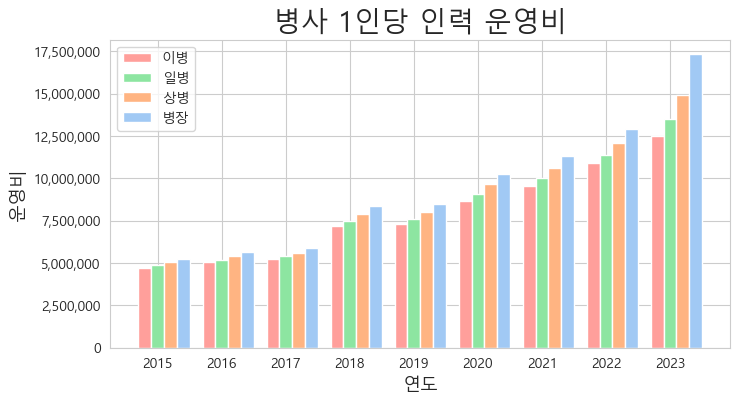

In [5]:
def y_format(y, pos):
    return f'{int(y):,}'

index = np.arange(len(df['연도']))
bar_width = 0.2

fig, ax = plt.subplots(figsize = (8, 4))
for i in range(4):
    lev = df.columns[::-1][:4][i]
    plt.bar(index + i*bar_width, df[lev], width = bar_width, color = colors[3-i], label = lev[:2])

ax.yaxis.set_major_formatter(FuncFormatter(y_format))
plt.title('병사 1인당 인력 운영비', fontsize = 20)
plt.xticks(np.arange(bar_width, len(df['연도']) + bar_width, 1), df['연도'])
plt.xlabel('연도', size = 13)
plt.ylabel('운영비', size = 13)
plt.legend()
plt.show()

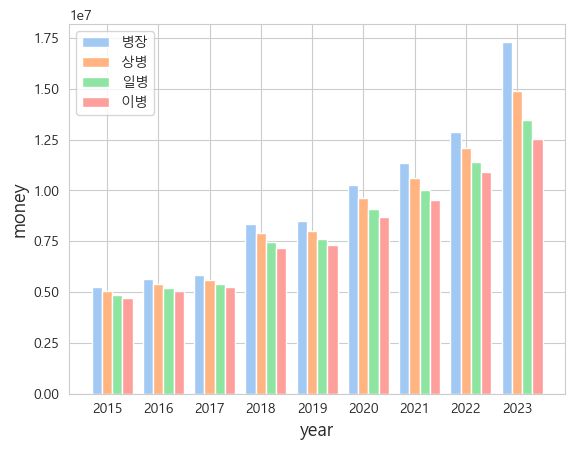

In [108]:
index = np.arange(len(df['연도']))
bar_width = 0.2

for i in range(4):
    lev = df.columns[-4:][i]
    plt.bar(index + i*bar_width, df[lev], width = bar_width, color = colors[i], label = lev[:2])
    
plt.xticks(np.arange(bar_width, len(df['연도']) + bar_width, 1), df['연도'])
plt.xlabel('year', size = 13)
plt.ylabel('money', size = 13)
plt.legend()
plt.show()